Step: 10000, Loss: 106011360.000000
Step: 20000, Loss: 56766896.000000
Step: 30000, Loss: 4236033.000000
Step: 40000, Loss: 2757568.500000
Step: 50000, Loss: 2757586.500000
Step: 60000, Loss: 2757586.000000
Step: 70000, Loss: 2757576.750000
Step: 80000, Loss: 2757569.500000
Step: 90000, Loss: 2757570.250000
Step: 100000, Loss: 2757581.750000


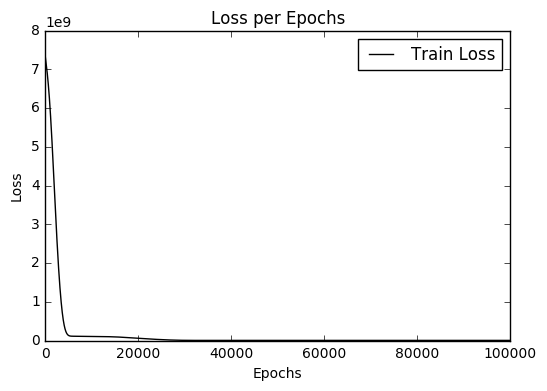


 Prediction using the developed model 
 Evaluation input:   [[30], [36]] 
 Predicted values:   [[39848.277]
 [43030.06 ]]


In [1]:
# -*- coding: utf-8 -*-
"""
Linear regression problem EX1
Predicting maintenance cost by age of facilities
@author: t.imai
"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

num_hidden = 100  # 隠れ層の次元数 変えてみることで精度などが変化する。

# xのshapeの2番めの値は入力するデータの種類をいれる。
x = tf.placeholder(tf.float32, shape=[None, 1])
t = tf.placeholder(tf.float32, shape=[None, 1])

# 入力層 - 隠れ層
W = tf.Variable(tf.truncated_normal([1, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.relu(tf.matmul(x, W) + b)

# 隠れ層 - 出力層
V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.matmul(h, V) + c    # 値の予測なので、活性化関数は使わない

loss = tf.reduce_sum(tf.square(y-t))

train_step = tf.train.AdamOptimizer().minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# この例題では、入力値を直接プラグラム文にかきこんでいる。普通は別ファイルから読み込む。
X_train = np.array([[33], [23], [39], [45]])
Y_train = np.array([[41000], [36000], [46000], [47000]])

# 学習の進行をグラフで描くために誤差をとっておく場所を確保する。for epochの前に置く。
loss_vec = []

i = 0
for epoch in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x: X_train, t: Y_train})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x: X_train, t: Y_train})
        print ('Step: %d, Loss: %f' % (i, loss_val))

    val_loss = sess.run(loss, feed_dict={x: X_train, t: Y_train})
    loss_vec.append(val_loss)

# lossの収束の様子をグラフに描く。 kは黒色、- は実線。 
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.title('Loss per Epochs')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()    

X_test = [[30], [36]]
Y_test_val = sess.run(y, feed_dict={x: X_test})  
print ("\n Prediction using the developed model", \
       "\n Evaluation input:  ", X_test, \
       "\n Predicted values:  ", Y_test_val)
